# Module 5 Exercises - Time Series

### Exercise 1:

Create a numPy datetime variable with today's date. Then create 7 consecutive days (1 week) starting from the variable with today's date.

In [1]:
import pandas as pd
import numpy as np
import seaborn; seaborn.set()
import matplotlib.pyplot as plt

from datetime import datetime

In [7]:
current = np.datetime64('today') # today's date
current 
current + np.arange(7)
#np.datetime64('now') # timestamp right now 

array(['2019-08-20', '2019-08-21', '2019-08-22', '2019-08-23',
       '2019-08-24', '2019-08-25', '2019-08-26'], dtype='datetime64[D]')

### Exercise 2:

Create a pandas datetime index with the dates 2016-02-11, 2016-07-01, 2016-07-09, 2016-10-08, 2017-02-18, 2017-02-25, 2017-05-02, 2017-08-26, 2017-12-15, and 2018-02-11. Then create a pandas Series with the values 0,1,2,3,4,5,6,7,8, and 9 in a list, with the dates as the index. Get the rows from the year 2017.  

In [11]:
#make index using timestamp
index = pd.DatetimeIndex(['2016-02-11', '2016-07-01', '2016-07-09', 
                         '2016-10-08', '2017-02-18', '2017-02-25', 
                         '2017-05-02', '2017-08-26', '2017-12-15', 
                         '2018-02-11'])

#a series is a singular column from a dataframe
data = pd.Series([0,1,2,3,4,5,6,7,8,9], index=index) 
data

2016-02-11    0
2016-07-01    1
2016-07-09    2
2016-10-08    3
2017-02-18    4
2017-02-25    5
2017-05-02    6
2017-08-26    7
2017-12-15    8
2018-02-11    9
dtype: int64

### Exercise 3:

Convert the following date formats into pandas datetime:

- datetime(2017, 12, 15)
- 8th of October 2016
- 20180211
- 2017-02-25
- 2019-Jan-16

In [12]:
#convert different formats into datetime
dates = pd.to_datetime([datetime(2017, 12, 15), 
                        '8th of October 2016', 
                        '20180211', 
                        '2017-02-25', '2019-Jan-16'])
dates

DatetimeIndex(['2017-12-15', '2016-10-08', '2018-02-11', '2017-02-25',
               '2019-01-16'],
              dtype='datetime64[ns]', freq=None)

### Exercise 4:

Using the pandas library, make a time delta range that has five periods with a 1 hour 45 minute interval.

In [13]:
#create 1 hour 45 minute intervals
pd.timedelta_range(0, periods=5, freq='1H45T')

TimedeltaIndex(['00:00:00', '01:45:00', '03:30:00', '05:15:00', '07:00:00'], dtype='timedelta64[ns]', freq='105T')

### Exercise 5:

Using the pandas library, create a time delta range with 20 business days starting from today's date.

In [14]:
#create business day offsets
from pandas.tseries.offsets import BDay

pd.date_range('2019-08-20', periods=5, freq=BDay())

DatetimeIndex(['2019-08-20', '2019-08-21', '2019-08-22', '2019-08-23',
               '2019-08-26'],
              dtype='datetime64[ns]', freq='B')

### Exercise 6:

From [this link](https://notebooks.azure.com/priesterkc/projects/DABmaterial/tree/Lv1%20Data%20Analytics/datasets), download the "smalltravel.csv" file and upload it to your datasets folder. Then using pandas, read the file into a dataframe. Resample the average speed column by week using the mean, and plot the graph. 

**Tip**: You do not need to add the line style in the plot code.

In [77]:
date_df = pd.read_csv("datasets/smalltravel.csv", encoding = "ISO-8859-1", index_col = 'Date', parse_dates = True) #1st column needs encoding to read pound/hashtag(#) symbol
date_df.head
#date_df.count()



<bound method NDFrame.head of            GoingTo  AvgSpeed  MovingTime
Date                                    
2012-01-06    Home      78.3        36.3
2012-01-06     GSK      81.8        34.9
2012-01-04    Home      82.0        35.9
2012-01-04     GSK      74.2        35.6
2012-01-03    Home      83.4        34.8
2012-01-03     GSK      84.5        35.0
2012-01-02    Home      82.9        35.3
2012-01-02     GSK      77.5        34.3
2011-12-23     GSK      80.9        36.0
2011-12-22    Home      70.6        39.3
2011-12-22     GSK      74.0        36.2
2011-12-21     GSK      71.7        39.4
2011-12-20    Home      75.2        37.3
2011-12-20     GSK      77.4        35.9
2011-12-19    Home      77.5        36.7
2011-12-19     GSK      76.5        35.5
2011-12-16    Home      86.9        33.8
2011-12-16     GSK      71.1        36.7
2011-12-15    Home      80.5        36.1
2011-12-15     GSK      68.1        40.9
2011-12-14    Home      75.1        38.6
2011-12-14     GSK      76.

Text(0.5, 0, 'Weekly Data')

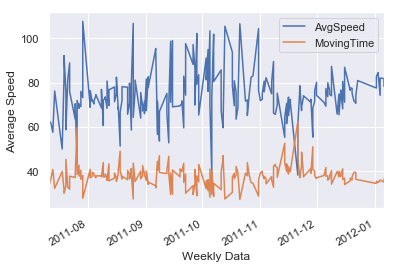

In [76]:
#bar plot of data
date_df.plot()
plt.ylabel('Average Speed')
plt.xlabel('Weekly Data')


In [48]:
#date_df.describe()
date_df['AvgSpeed'].describe()

count    205.000000
mean      74.477561
std       11.409816
min       38.100000
25%       68.900000
50%       73.600000
75%       79.900000
max      107.700000
Name: AvgSpeed, dtype: float64

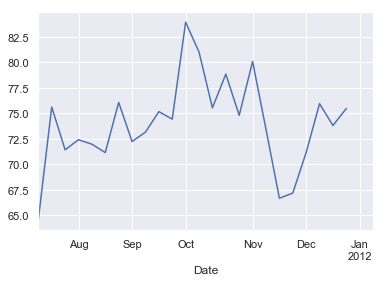

In [71]:
#Aggregate as weekly data
#date_df.dtypes 
weekly_summary = date_df['AvgSpeed'].resample('W').mean()
weekly_summary.plot()


### Exercise 7:

Using the dataframe from the previous exercise, write code to group the moving time column by day of the week, then plot the graph.

**Tip**: The index list only needs to contain the weekdays. You do not need to add the line style in the plot code.

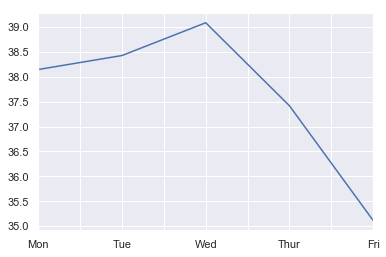

In [78]:
by_weekday = date_df['MovingTime'].groupby(date_df.index.dayofweek).mean()
by_weekday.index = ['Mon', 'Tue', 'Wed', 'Thur', 'Fri']
by_weekday.plot()